> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### TMDb movie data 
#### Dataset Description 

I have selected TMDb movie data originally from kaggle for this Data Analysis project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis

The dataset contains a lot of attributes associated with movies and contains plentiful information for exploring, so it can help us explore the trend in movie popularity and success. Therefore, the questions I am going to explore are:
 
 ##### Research question 1. Most popular genres from year to year.
 ##### Research question 2. Factors contributing to the success of a movie

Now, we will import the necessary packages that we will be using to explore our dataset.

In [4]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load our data then explore, inspect, and clean the data.

###  Loading the data

In [5]:
# Loading data
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

 ###  Now we will check some basic information about our dataset

- Let's find no. of rows and columns in our dataset

In [6]:
# No. of rows and columns in our dataset
df.shape

(10866, 21)

The above result shows that TMdb dataset consists of 10866 rows and 21 columns.

- Now, lets list the name of the columns of the dataset

In [7]:
#Listing column names
list(df.columns.values)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

- Let's inspect first 10 rows of the dataset now

In [8]:
# First 10 rows from dataset
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

These are the first 10 rows from the TMdb dataset.

In [9]:
#  Let's check the column info and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The above result shows that there are only few null value in the cast, director, overview and genres columns. But some columns are with a lot of null value rows like homepage, tagline, keywords and production_companies, especially the homepage and tagline columns are even not necessary for answering the question, so we can decide to drop both of the columns.

- Now, lets see some descriptive statistics for this dataset

In [10]:
# Descriptive statistics for our datset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

First we will inspect the data and check for null values
 

In [11]:
# Finding null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see that tagline, homepage, cast, production_companies, keywords columns have a lot of null values in comparison to imdb_id, director, overview and genres columns which have few null values. 

Since tagline, homepage, cast, production_companies, keywords columns are also not required in answering our questions so we will drop these columns. 

In [12]:
# Dropping columns that won't be used in our analysis
df.drop(columns = ['tagline','homepage', 'cast', 'production_companies', 'keywords'], inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We can see now that these columns have been removed.
Let's also drop the missing values in the genres columns since we would require genres data in our analysis and so it's cleaning is required.

In [13]:
# Dropping rows with missing values in the 'genres' column
df.dropna(how='any', subset=['genres'], inplace=True)

In [14]:
# Let's check if the rows with null values in genres column have been removed
df.isna().sum()

id                 0
imdb_id            8
popularity         0
budget             0
revenue            0
original_title     0
director          42
overview           3
runtime            0
genres             0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

We can see that the genres column does have any null value now

- Let's check for duplicated rows also

In [15]:
# Checking for duplicated rows
df.duplicated().sum()

1

This shows that there are no duplicated rows in our dataset

In [16]:
# removing rows where revenue_adj and budget_adj is equal to zero
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

- Let's again check the descriptive statistics of the dataset now

In [17]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


Now, our data has been cleaned

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Most popular genre from year to year)

In this question, we will try to find the most popular genre from year to year and over the years based on below:

1. Most popular genre based on popularity rating of movies
2. Most popular genre based on no. of movies produced
3. Most popular genre based on total revenue collected

However, before finding answer for these questions, we notice the genres columns have more than 1 genre, so we need to consider all the genres to find out the most popular genres.If we just choose one genre from each movie, our analysis would be biased.
So, we will use all genres of each movie for our analysis.

For this, first i'll create a new dataframe which would be a copy of the previous dataframe only so that even if something goes wrong, we will have the previous cleaned dataframe as it is.
We will also convert genres datatype to string just to make sure our data type is consistent.

In [18]:
# copying a new dataframe 
df1 = df.copy()

In [19]:
#converting genres datatype to string
df1.genres = df1.genres.astype('str')

Now, let's modify the 'genres' column in df1 so that each cell will contain a list of values instead of a single string.

In [20]:
# split the genres string
df1.genres = df1.genres.str.split('|')
#Let's see first 10 rows after spliting of genres string
df1.head(n=10)

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,"[Western, Drama, Adventure, Thriller]",12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,"[Science Fiction, Action, Thriller, Adventure]",6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,"[Drama, Adventure, Science Fiction]",9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,"[Family, Animation, Adventure, Comedy]",6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,"[Comedy, Animation, Family]",6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


As we already know that the genres columns have more than 1 genre. For example, Minions has 4 genres i.e.,Family, Animation, Adventure and Comedy .
So, to tidy up the data, lets split the genre columns and create each row for each genre and perform the calculation.

In [21]:
# creating genre list( create each row for each gen) using explode 
df1 = df1.explode('genres')
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


We can see now that the genres column has been split and new rows have been created for each genre for each movie.

Lets see the list of all genres that we have in the genres column

In [22]:
genre_type= df1.genres.unique()
genre_type

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

Now, we have tidied up our genres column so we can move to find answer for our question about popular genres based on popularity of movies, no. of movies produced and total adjusted revenue.

But before going to that, let's define some functions which will help us in plotting:

##### Lets define function for plotting scatter plot first.

In [81]:
def plot_scatter(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, rotation=None, legend_loc=None, bbox_to_anchor=None):
    '''
    Function to create a scatter plot using Seaborn.

    Parameters:
    - data: DataFrame, the dataset to be plotted.
    - x: the column name for the x-axis.
    - y: the column name for the y-axis.
    - hue: optional, the column name to differentiate groups in the plot.
    - title: optional, the title of the plot.
    - xlabel: optional, the label for the x-axis.
    - ylabel: optional, the label for the y-axis.
    - rotation: optional, rotation angle for x-axis labels.
    - legend_loc: optional, location of the legend.
    - bbox_to_anchor: optional, the anchor point of the legend box.
    '''
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x, y=y, hue=hue, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotation:
        plt.xticks(rotation=rotation)
    if hue and legend_loc:
        plt.legend(title=hue, loc=legend_loc, bbox_to_anchor=bbox_to_anchor)
    
    # Display the plot
    plt.show()


##### Lets define function for bar plot as well now

In [74]:
def plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, rotation=None, legend_loc=None, bbox_to_anchor=None):
    '''
    Function to create a bar plot using Seaborn.

    Parameters:
    - data: DataFrame, the dataset to be plotted.
    - x: the column name for the x-axis.
    - y: the column name for the y-axis.
    - hue: optional, the column name to differentiate groups in the plot.
    - title: optional, the title of the plot.
    - xlabel: optional, the label for the x-axis.
    - ylabel: optional, the label for the y-axis.
    - rotation: optional, rotation angle for x-axis labels.
    - legend_loc: optional, location of the legend.
    - bbox_to_anchor: optional, the anchor point of the legend box.
    '''
    plt.figure(figsize=(12, 8))
    sns.barplot(x=x, y=y, hue=hue, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotation:
        plt.xticks(rotation=rotation)
    if hue and legend_loc:
        plt.legend(title=hue, loc=legend_loc, bbox_to_anchor=bbox_to_anchor)
    
    # Display the plot
    plt.show()

#### 1.1 Most popular genre based on popularity of movies

First, let's see descriptive statistics of popularity column

In [24]:
df['popularity'].describe()

count    3855.000000
mean        1.191400
std         1.475002
min         0.001117
25%         0.462448
50%         0.797298
75%         1.368245
max        32.985763
Name: popularity, dtype: float64

The above data shows that the major popularity value fall below 1. From the summary of statistics, we can see the movies which have popularity greater than 1 are considered popular and the maximum popularity for a movie is 32.98.

#### Let's calculate the popularity of each genres for each year based on popularity rating of movies.

In [25]:
# average popularity of each genres for each year
genres_count_year = df1.groupby(['release_year','genres'], as_index=False)['popularity'].mean()
genres_count_year.head(10)

,release_year,genres,popularity
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.501564
3,1960,Drama,1.564871
4,1960,History,1.136943
5,1960,Horror,2.610362
6,1960,Romance,0.501564
7,1960,Thriller,2.610362
8,1960,Western,1.872132
9,1961,Action,0.464139


#### Now, let's find the most popular genre of each year based on popularity of movies

In [26]:
# naming the dataframe again to find the most popular genre of each year 
popular_genre_by_year = genres_count_year.reset_index(drop=True)
# Find the index of the maximum popularity for each year
idx = popular_genre_by_year.groupby('release_year')['popularity'].idxmax()
# Filter the DataFrame using the indices
popular_genre = popular_genre_by_year.loc[idx].reset_index(drop=True)
popular_genre.head(35)

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1961,Animation,2.631987
2,1962,Thriller,3.170651
3,1963,Adventure,1.586280
4,1964,Action,3.153791
5,1965,Thriller,1.910465
6,1966,Drama,0.485092
7,1967,Animation,2.550704
8,1968,Mystery,1.728887
9,1969,Action,1.778746


##### Plotting a scatter plot for most popular genre of each year

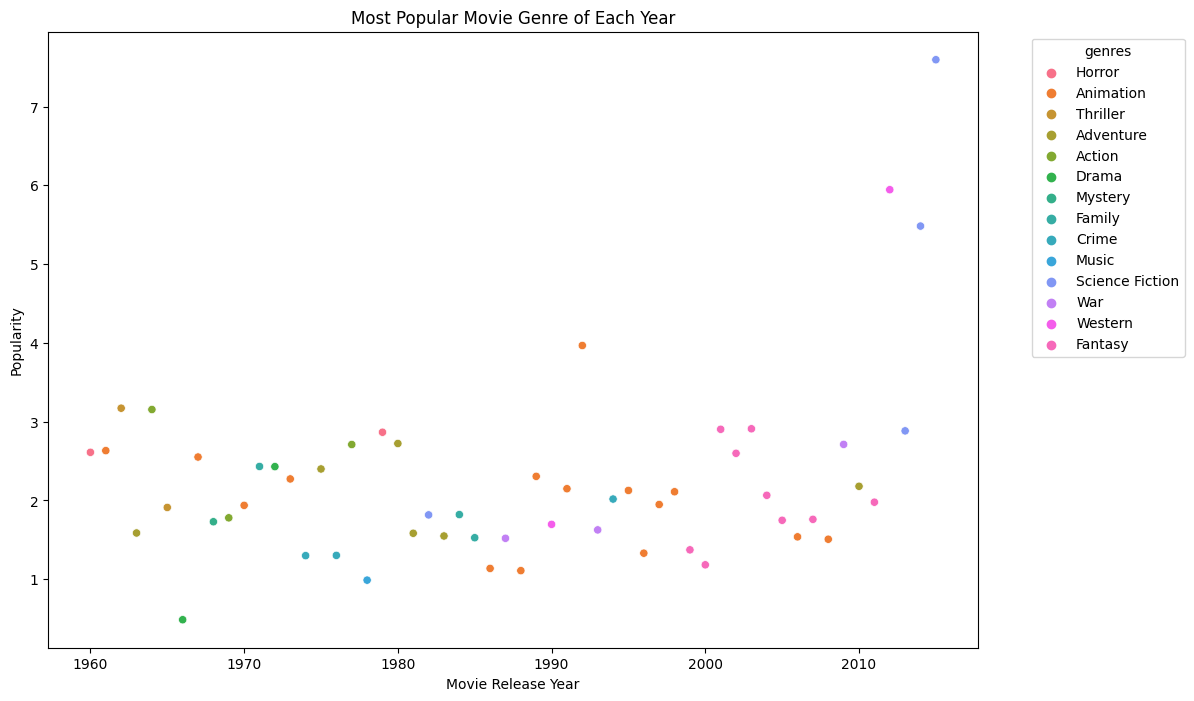

In [82]:
plot_scatter(data=popular_genre,
             x='release_year',
             y='popularity',
             hue='genres',
             title='Most Popular Movie Genre of Each Year',
             xlabel='Movie Release Year',
             ylabel='Popularity',
             legend_loc='upper left',
             bbox_to_anchor=(1.05, 1))

##### Plotting a bar graph showing distribution of popular genres over the years based on movie popularity

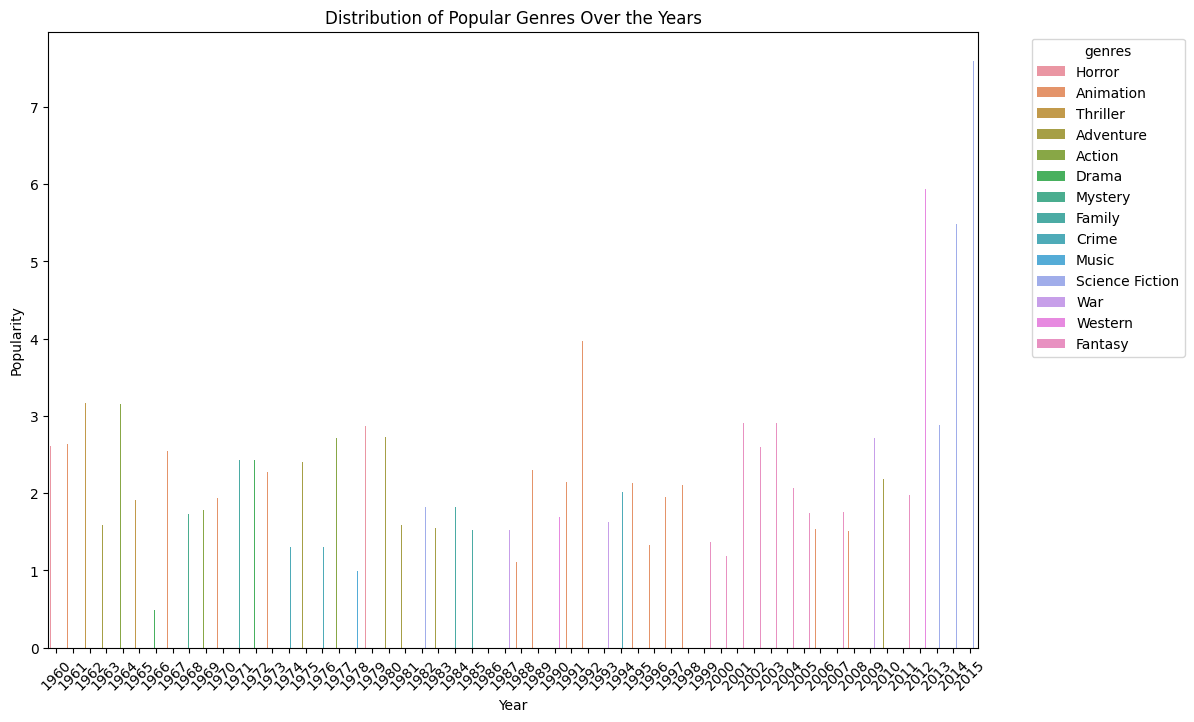

In [47]:
plot_bar(data=popular_genre,
         x='release_year',
         y='popularity',
         hue='genres',
         title='Distribution of Popular Genres Over the Years',
         xlabel='Year',
         ylabel='Popularity',
         rotation=45,
         legend_loc='upper left',
         bbox_to_anchor=(1.05, 1))

These plots show that Animation genre was most popular in terms of popularity rating of movies in many years.

In [49]:
# Group by 'genres' and calculate the total popularity for each genre
popularity_by_genre = df1.groupby('genres')['popularity'].mean().reset_index()

# Find the most popular genre
most_popular_genre = popularity_by_genre.loc[popularity_by_genre['popularity'].idxmax()]

most_popular_genre


genres        Science Fiction
popularity           1.870838
Name: 15, dtype: object

We have taken the mean here as the popularity column  provides a numerical score for each movie, and taking the mean would give us the average popularity of each genre.

##### Plotting a bar graph to show average popularity of genres over years

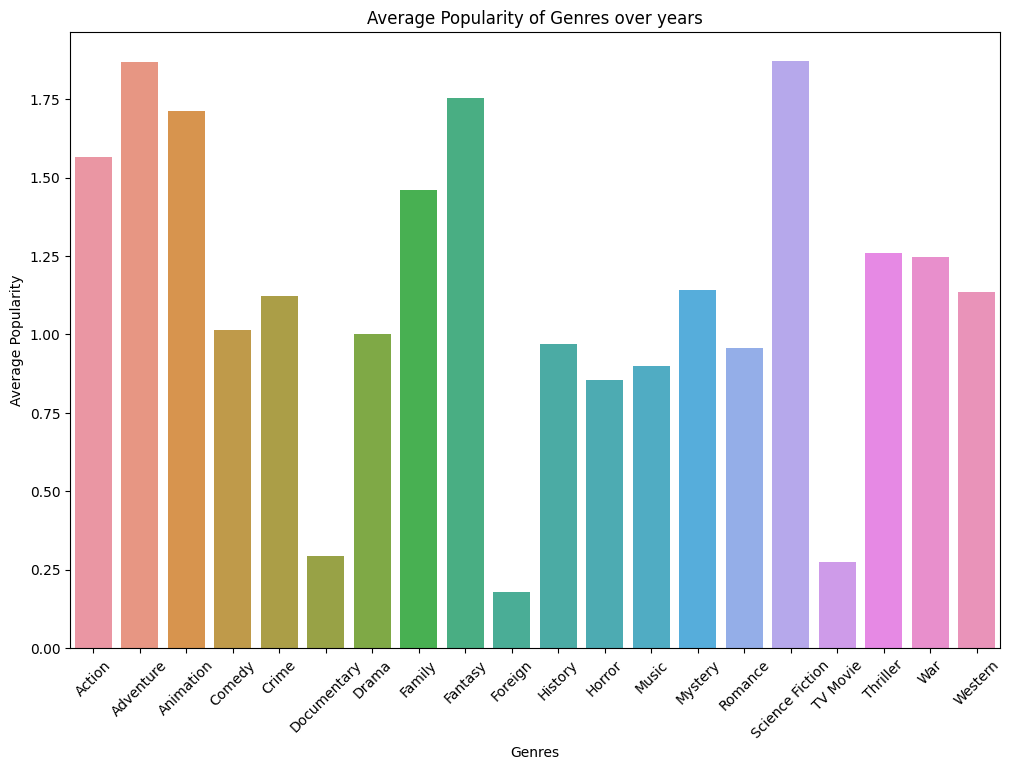

In [75]:
plot_bar(data=popularity_by_genre,
         x='genres',
         y='popularity',
         title='Average Popularity of Genres over years',
         xlabel='Genres',
         ylabel='Average Popularity',
         rotation=45)

This shows that Science Fiction is the most popular genre based on popularity rating of movies over the years.

#### 1.2 Most popular genre over the years based on number of movies

In [52]:
genre_count = df1['genres'].value_counts()
genre_count

Drama              1757
Comedy             1358
Thriller           1205
Action             1086
Adventure           749
Romance             667
Crime               652
Science Fiction     520
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

##### Bar graph showing most popular genres over the years based on total movies produced

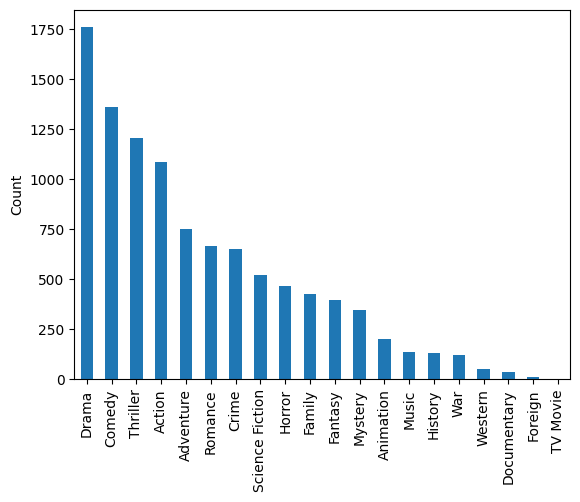

In [55]:
# Popular of genres summary during 1960 to 2015 period
# Most popular genres over the years
genre_count.plot(kind='bar').set_ylabel('Count');

The most popular genre during 1960 to 2015 period is Drama, followed by Comedy and Thriller.

#### Most popular movie genre based on number of movies made per year

In [57]:
# Group by 'release_year' and 'genres', then count the number of movies for each genre in each year
genre_counts_by_year = df1.groupby(['release_year', 'genres']).size().reset_index(name='movie_count')

# Find the index of the maximum movie count for each year
idx_max_movie_count = genre_counts_by_year.groupby('release_year')['movie_count'].idxmax()

# Use the indices to filter the DataFrame and get the most popular genre for each year
most_popular_genre_by_year = genre_counts_by_year.loc[idx_max_movie_count][['release_year', 'genres', 'movie_count']].reset_index(drop=True)
# Display the result
most_popular_genre_by_year


,release_year,genres,movie_count
0,1960,Drama,3
1,1961,Drama,6
2,1962,Drama,5
3,1963,Drama,3
4,1964,Drama,4
5,1965,Drama,3
6,1966,Action,2
7,1967,Drama,7
8,1968,Drama,6
9,1969,Adventure,2


##### Bar graph for popular genre each year based on total movies produced

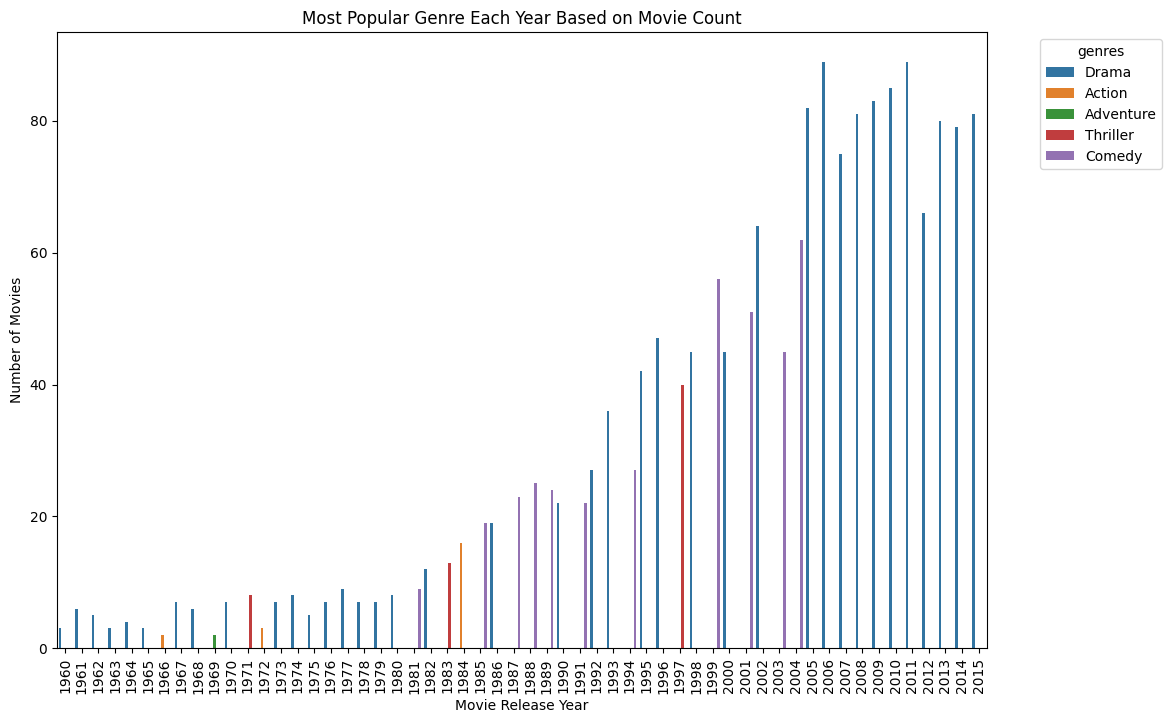

In [60]:
plot_bar(data=most_popular_genre_by_year,
         x='release_year',
         y='movie_count',
         hue='genres',
         title='Most Popular Genre Each Year Based on Movie Count',
         xlabel='Movie Release Year',
         ylabel='Number of Movies',
         rotation=90,
         legend_loc='upper left',
         bbox_to_anchor=(1.05, 1))

#### 1.3 Most popular genre based on total adjusted revenue.

#### Popular movie genres each year based on total adjusted movie revenue.

In [62]:
# Group by 'genres' and 'release_year', calculate the total revenue for each genre in each year
revenue_by_genre_year = df1.groupby(['genres', 'release_year'])['revenue_adj'].sum().reset_index()

# Find the most popular genre based on revenue for each year
most_revenue_genre_year = revenue_by_genre_year.loc[revenue_by_genre_year.groupby('release_year')['revenue_adj'].idxmax()].reset_index(drop=True)

most_revenue_genre_year


,genres,release_year,revenue_adj
0,Drama,1960,8.626372e+08
1,Adventure,1961,1.785636e+09
2,Adventure,1962,1.294637e+09
3,Thriller,1963,6.933157e+08
4,Music,1964,1.232218e+09
5,Drama,1965,1.985760e+09
6,Drama,1966,3.610039e+08
7,Adventure,1967,2.702776e+09
8,Drama,1968,7.855699e+08
9,Drama,1969,8.743653e+08


##### Bar graph for popular genre each year based on total adjusted movie revenue

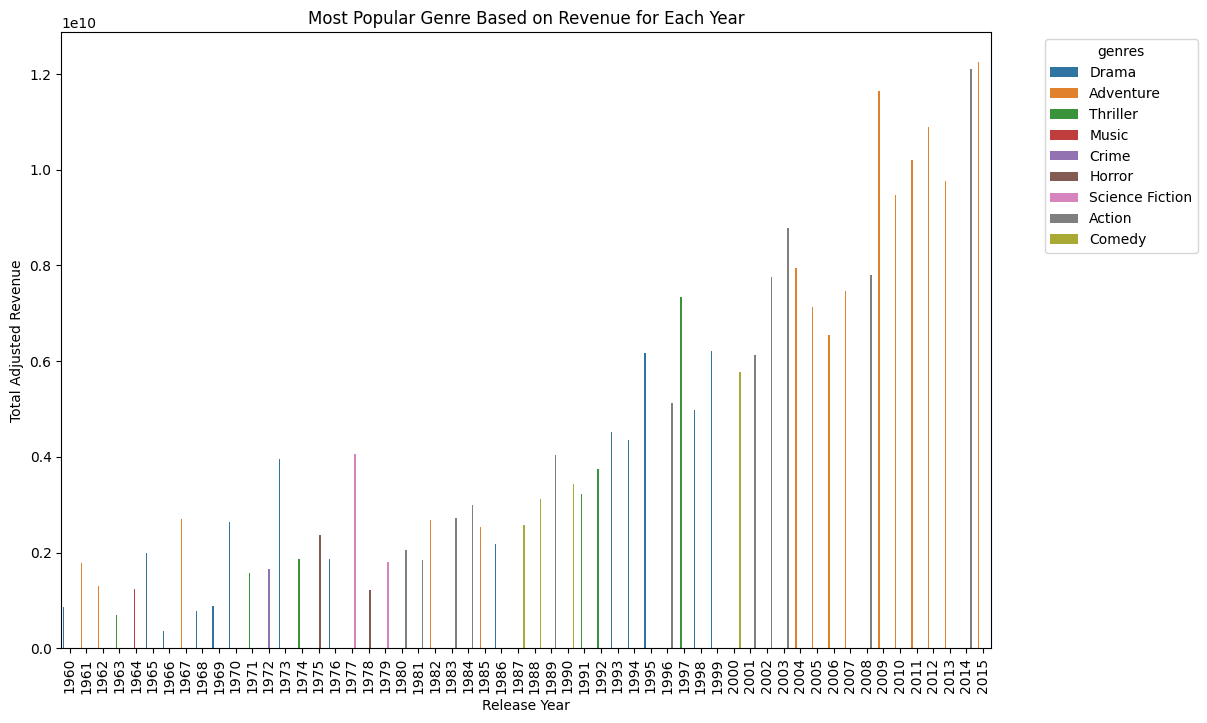

In [87]:
plot_bar(data=most_revenue_genre_year,
         x='release_year',
         y='revenue_adj',
         hue='genres',
         title='Most Popular Genre Based on Revenue for Each Year',
         xlabel='Release Year',
         ylabel='Total Adjusted Revenue',
         rotation=90,
         legend_loc='upper left',
         bbox_to_anchor=(1.05, 1))

#### Popular movie genres over the years based on total adjusted movie revenue.

In [64]:
# Group by 'genres' and calculate the total revenue for each genre
genre_revenue = df1.groupby('genres')['revenue_adj'].sum().reset_index()

# Sort the DataFrame by total revenue in descending order
sorted_genre_revenue = genre_revenue.sort_values(by='revenue_adj', ascending=False)

# Display the sorted DataFrame
print(sorted_genre_revenue)


             genres   revenue_adj
0            Action  2.119969e+11
1         Adventure  2.032842e+11
6             Drama  1.780216e+11
3            Comedy  1.647370e+11
17         Thriller  1.543187e+11
15  Science Fiction  1.049184e+11
7            Family  1.036112e+11
8           Fantasy  9.899713e+10
14          Romance  7.571774e+10
4             Crime  7.186820e+10
2         Animation  5.848243e+10
13          Mystery  3.908563e+10
11           Horror  3.769124e+10
18              War  1.855188e+10
12            Music  1.830098e+10
10          History  1.569436e+10
19          Western  7.055088e+09
5       Documentary  8.682158e+08
9           Foreign  1.655391e+08
16         TV Movie  5.838910e+07


##### Bar graph for popular genre over the years based on total adjusted movie revenue

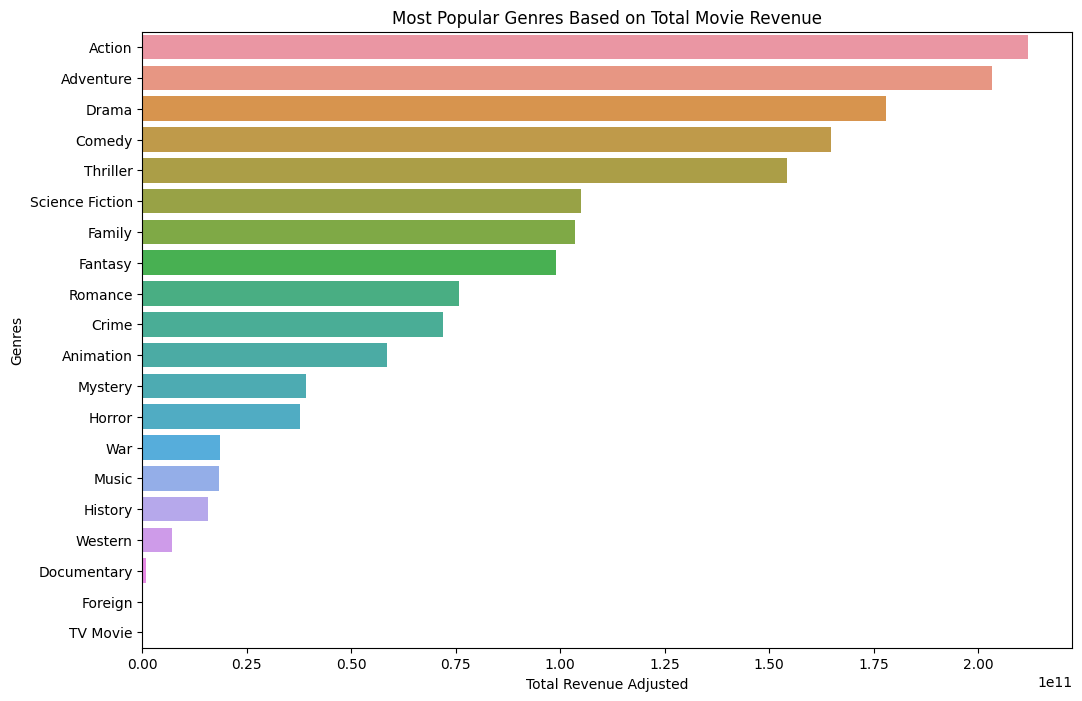

In [86]:
plot_bar(data=sorted_genre_revenue,
         x='revenue_adj',
         y='genres',
         title='Most Popular Genres Based on Total Movie Revenue',
         xlabel='Total Revenue Adjusted',
         ylabel='Genres')

### Research Question 2  (Factors contributing to the success of a movie)

Following questions can be asked in relation to this:

1. How does movie popularity correlate with budget and revenue?
2. Are certain genres more likely to generate higher revenue and popularity?
3. Do movies with higher budgets tend to have higher revenue?


These questions will help us in finding the factors that contribute to the success of a movie and if there is an correlation between.

#### 2.1: How does movie popularity correlate with budget and revenue?

Taking a subset of dataframe df showing only popularity, budget_adj and revenue_adj columns. Using original dataframe df as genre not considered in  answering this question so df1 dataframe having separate genre rows is not required.

In [29]:
df2 = df[['popularity', 'budget_adj', 'revenue_adj']]
df2.head()

,popularity,budget_adj,revenue_adj
0,32.985763,1.379999e+08,1.392446e+09
1,28.419936,1.379999e+08,3.481613e+08
2,13.112507,1.012000e+08,2.716190e+08
3,11.173104,1.839999e+08,1.902723e+09
4,9.335014,1.747999e+08,1.385749e+09


##### Plotting a correlation pairplot for the above data subset

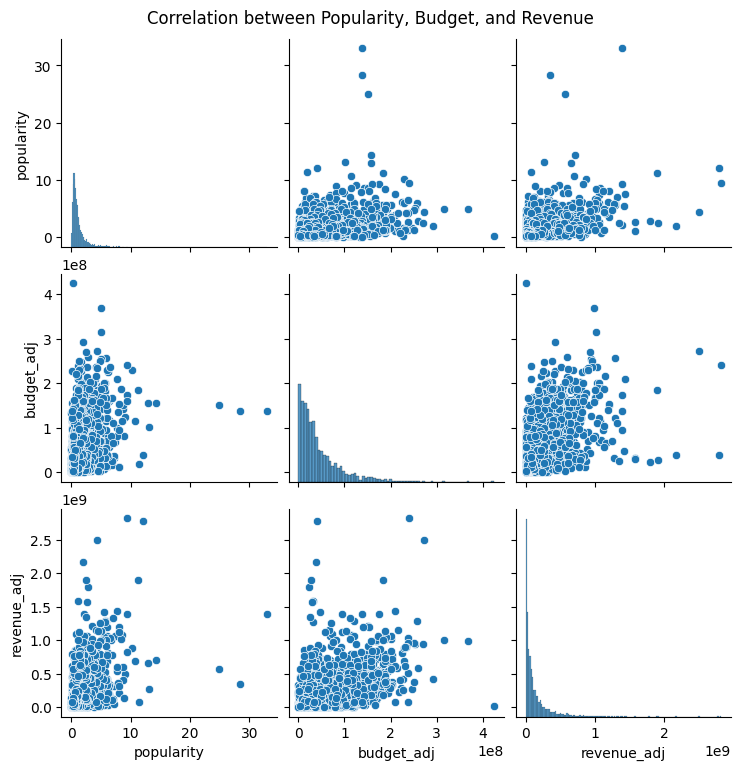

In [30]:
# Plotting correlation using a pairplot
sns.pairplot(df2)
plt.suptitle('Correlation between Popularity, Budget, and Revenue', y=1.02)
plt.show()


This correlation pairplot shows that there is a positive correlation between budget and revenue represented by scatter plot of budget_adj and revenue_adj. There is also some positive correlation between budget and popularity but it is not as strong as the one between budget and revenue. Additionally, there's a general trend of movies with higher revenue also having higher popularity, but the relationship is not as clear-cut as there are instances showing contrary.

#### 2.2 Are certain genres more likely to generate higher revenue and popularity?

Let's calculate the average revenue and popularity for each genre and sort the genres by average revenue in descending order. Using dataframe df1 here as we split the genres in that dataframe and created new rows for each genre.

In [31]:
# Display average revenue and popularity by genre
genre_revenue_popularity = df1.groupby('genres')[['revenue_adj', 'popularity']].mean().sort_values(by='revenue_adj', ascending=False).reset_index()
genre_revenue_popularity

,genres,revenue_adj,popularity
0,Animation,2.909574e+08,1.710622
1,Adventure,2.714075e+08,1.867693
2,Fantasy,2.499928e+08,1.754315
3,Family,2.437910e+08,1.459043
4,Science Fiction,2.017662e+08,1.870838
5,Action,1.952089e+08,1.566222
6,War,1.558981e+08,1.246129
7,Western,1.356748e+08,1.134246
8,Music,1.345660e+08,0.899005
9,Thriller,1.280653e+08,1.258400


##### Scatterplot for revenue vs popularity with genres

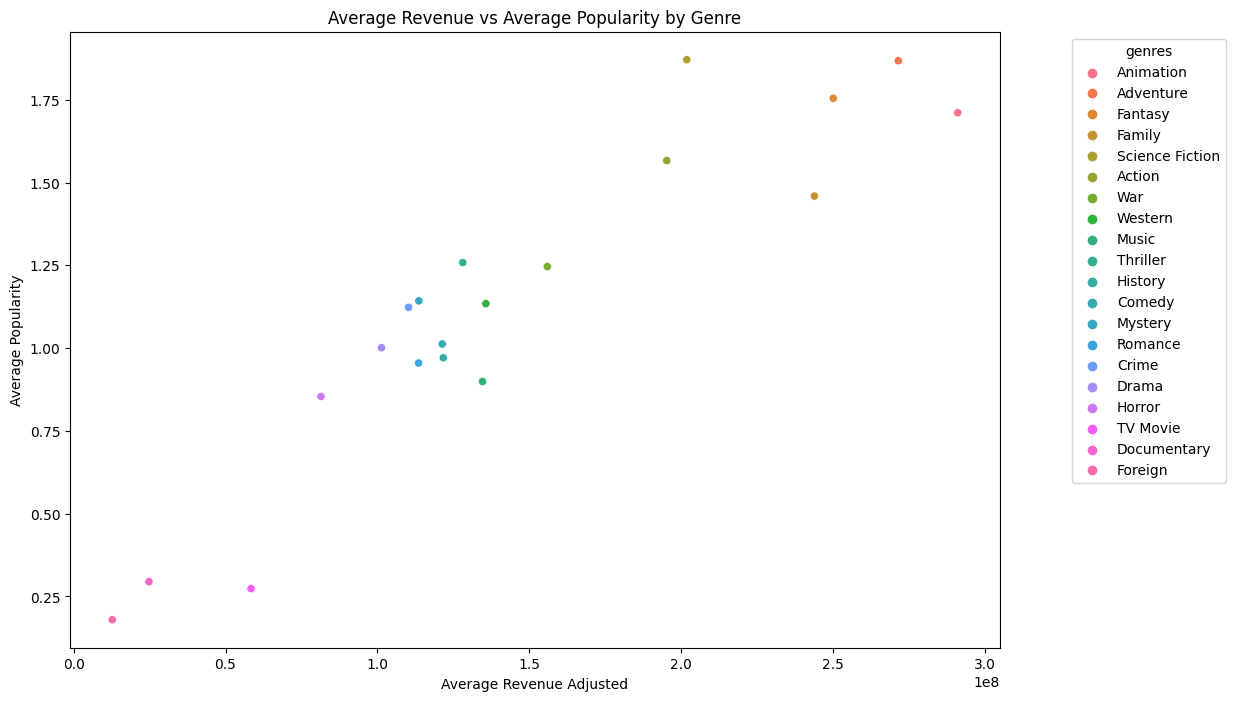

In [83]:
# Call the plot_scatter function with appropriate parameters
plot_scatter(data=genre_revenue_popularity,
             x='revenue_adj',
             y='popularity',
             hue='genres',
             title='Average Revenue vs Average Popularity by Genre',
             xlabel='Average Revenue Adjusted',
             ylabel='Average Popularity',
             legend_loc='upper right',  # Adjusted location of the legend box
             bbox_to_anchor=(1.25, 1))  # Positioning the legend outside the plot area

This shows that certain genres are more popular and generate more revenue compared to others. Genres such as Animation, Adventure, and Fantasy appear to be among the top performers in terms of both average revenue and average popularity. These genres have relatively high values for both metrics.

#### 2.3 Do movies with higher budgets tend to have higher revenue?

Again, taking a subset of dataframe df showing only budget_adj and revenue_adj columns. Using original dataframe df as genre not considered in  answering this question so df1 dataframe having separate genre rows is not required. We are only taking into account budget and revenue in this question.

In [66]:
# Display a subset of the data having only budget_adj and revenue_adj data
df3 = df[['budget_adj', 'revenue_adj']]
df3.head()

,budget_adj,revenue_adj
0,1.379999e+08,1.392446e+09
1,1.379999e+08,3.481613e+08
2,1.012000e+08,2.716190e+08
3,1.839999e+08,1.902723e+09
4,1.747999e+08,1.385749e+09


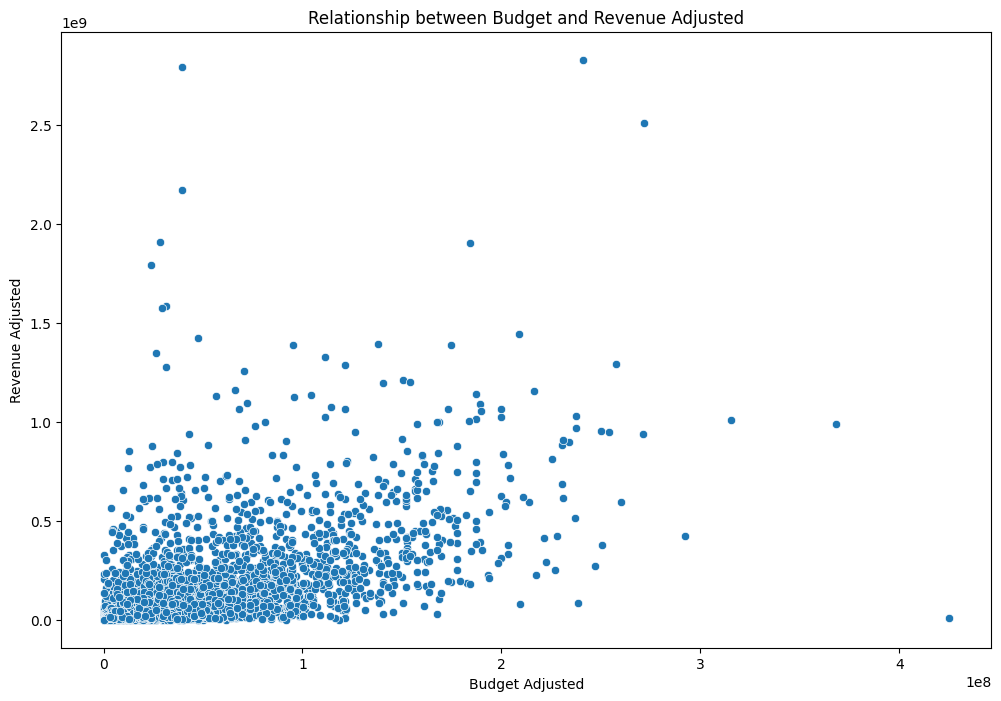

In [84]:
# Plotting relationship between budget and revenue
plot_scatter(data=df3,
             x='budget_adj',
             y='revenue_adj',
             title='Relationship between Budget and Revenue Adjusted',
             xlabel='Budget Adjusted',
             ylabel='Revenue Adjusted')

The above plot shows that there is a positive relationship between budget and revenue. 

<a id='conclusions'></a>
## Conclusions


### Limitations of dataset

The data limitations of this dataset:
 1. Almost every movie has multiple genres due to which we had to split genres and create new rows for each genre so that these could be included during our calculation.
 2. The dataset contains null and zero values in some columns which negatively impacts the analysis. Due to this, rows that correspond to these zero and null values had to be removed. For example if we would have kept zero values then these values would create false results during the correlation plots, so a lot of rows had to be removed while cleaning adjusted budget and revenue data. 

 
Additionally, exploration of runtime of movies accross different genres, correlation of average vote with movie popularity and revenue is also possible.


#### Final Conclusion:
From my research, I found that there are 20 unique movie genres but drama is the one that show an increasing trend all over these years based on the number of movies produced.However,the most popular genre based on movie popularity rating is Science Fiction while Action is the genre which takes the top spot on the basis of total movie revenue as Action movies have generated the most revenue over the years. Finally, our plots also show that there is a positive correlation between budget and revenue. There is also some positive correlation between budget and popularity but it is not as strong as the one between budget and revenue. Additionally, there's a general trend of movies with higher revenue also having higher popularity, but the relationship is not as clear-cut as there are instances showing contrary. Further, our analysis show that genres such as Animation, Adventure, and Fantasy appear to be among the top performers in terms of both average revenue and average popularity. These genres have relatively high values for both metrics, suggesting that they have a strong commercial appeal and are well-received by audiences. Hence, this shows that although the success in the movie industry depends on a combination of factors, the movie makers should allocate budgets strategically, considering the genre of the movie and its potential revenue. Investing more in genres that historically yield higher revenue could increase the chances of financial success.


In [89]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1483578 bytes to Investigate_a_Dataset.html
